In [ ]:
from datamodel import * 
from test import Trader
import pandas as pd
import seaborn as sns
import numpy as np

from analysis import *

In [31]:
prices = pd.read_csv('/Users/denysshkola/Downloads/round-1-island-data-bottle/prices_round_1_day_0.csv',delimiter=';')

In [32]:
prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,RAINFOREST_RESIN,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,KELP,2028,30,NaN,NaN,NaN,NaN,2032,30,NaN,NaN,NaN,NaN,2030.0,0.0
2,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0
3,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN,1970.0,0.0
4,0,100,KELP,2030,4,2028.0,31.0,NaN,NaN,2032,31,NaN,NaN,NaN,NaN,2031.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999800,KELP,2032,27,NaN,NaN,NaN,NaN,2034,1,2035.0,27.0,NaN,NaN,2033.0,0.0
29996,0,999800,RAINFOREST_RESIN,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
29997,0,999900,RAINFOREST_RESIN,9996,2,9995.0,21.0,NaN,NaN,10004,2,10005.0,21.0,NaN,NaN,10000.0,0.0
29998,0,999900,SQUID_INK,1838,23,NaN,NaN,NaN,NaN,1841,23,NaN,NaN,NaN,NaN,1839.5,0.0


In [33]:
trades = pd.read_csv('/Users/denysshkola/Downloads/round-1-island-data-bottle/trades_round_1_day_0.csv',delimiter=';')
trades.drop(columns=['buyer','seller'],inplace=True)

In [34]:
prices.drop(columns=['profit_and_loss'],inplace=True)

<Axes: xlabel='timestamp', ylabel='mid_price'>

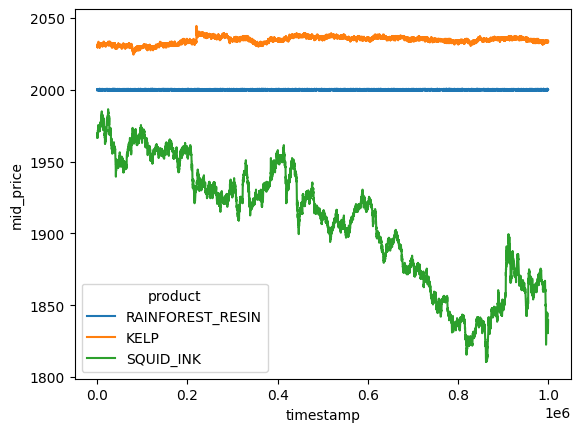

In [35]:
temp = prices.copy()
temp.loc[temp['product'] == 'RAINFOREST_RESIN', 'mid_price'] /= 5
sns.lineplot(temp,x='timestamp',y='mid_price',hue='product')

In [36]:
drop_col = ['product']#,'bid_price_1','bid_volume_1','bid_price_2','bid_volume_2','bid_price_3','bid_volume_3','ask_price_1','ask_volume_1','ask_price_2','ask_volume_2','ask_price_3','ask_volume_3']

In [37]:
resin = prices.loc[prices['product'] == 'RAINFOREST_RESIN'].drop(columns=drop_col).ffill()
kelp = prices.loc[prices['product'] == 'KELP'].drop(columns=drop_col).ffill()
ink = prices.loc[prices['product'] == 'SQUID_INK'].drop(columns=drop_col).ffill()

In [38]:
resin['return'] = resin['mid_price'].pct_change()

In [39]:
kelp['return'] = kelp['mid_price'].pct_change()

In [40]:
ink['return'] = ink['mid_price'].pct_change()

<Axes: xlabel='return', ylabel='Count'>

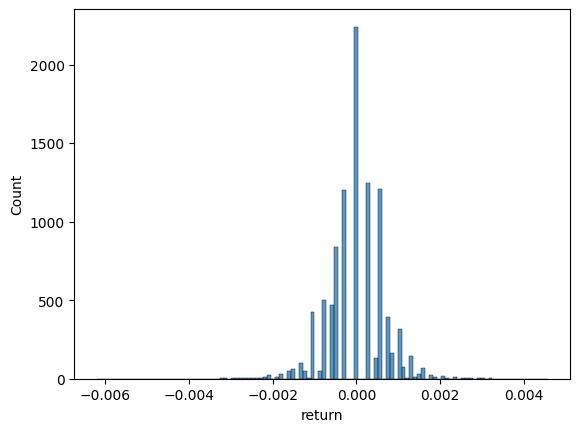

In [41]:
sns.histplot(ink['return'].dropna())

In [42]:
np.percentile(ink['return'].dropna(),1)

np.float64(-0.0017967238048041945)

In [43]:
np.corrcoef(kelp.dropna()['return'], ink.dropna()['return'])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 9869 and the array at index 1 has size 9856

In [ ]:
ink.corr()

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,return
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,NaN,1.000000,-0.917815,-0.005612,-0.917936,0.015201,-0.915132,0.048689,-0.917831,0.020399,-0.917960,-0.007425,-0.915467,-0.102219,-0.917867,-0.001019
bid_price_1,NaN,-0.917815,1.000000,-0.007484,0.998634,-0.009105,0.976287,-0.027346,0.999810,-0.016046,0.998844,-0.015946,0.982430,0.107404,0.999952,0.016040
bid_volume_1,NaN,-0.005612,-0.007484,1.000000,0.004215,-0.000006,0.005632,-0.005913,0.000912,-0.043042,0.003816,0.027370,0.008735,-0.000673,-0.003284,-0.231943
bid_price_2,NaN,-0.917936,0.998634,0.004215,1.000000,-0.012327,0.977986,-0.026495,0.998606,-0.019273,0.998616,-0.014790,0.983612,0.107005,0.998667,-0.005337
bid_volume_2,NaN,0.015201,-0.009105,-0.000006,-0.012327,1.000000,-0.004117,-0.068365,-0.009194,0.004836,-0.008825,-0.009316,-0.003124,0.014972,-0.009150,-0.009670
bid_price_3,NaN,-0.915132,0.976287,0.005632,0.977986,-0.004117,1.000000,-0.008972,0.976251,-0.025237,0.977508,-0.011898,0.979824,0.109392,0.976316,-0.011510
bid_volume_3,NaN,0.048689,-0.027346,-0.005913,-0.026495,-0.068365,-0.008972,1.000000,-0.027122,0.013275,-0.029372,-0.006760,-0.022232,0.025474,-0.027235,-0.003176
ask_price_1,NaN,-0.917831,0.999810,0.000912,0.998606,-0.009194,0.976251,-0.027122,1.000000,-0.006306,0.998842,-0.015397,0.982485,0.107425,0.999953,0.016536
ask_volume_1,NaN,0.020399,-0.016046,-0.043042,-0.019273,0.004836,-0.025237,0.013275,-0.006306,1.000000,-0.019236,0.002515,-0.019919,-0.000947,-0.011174,0.265629


In [44]:
k_p = np.array(kelp.mid_price)
i_p = np.array(ink.mid_price)
r_p = np.array(resin.mid_price)

<Axes: >

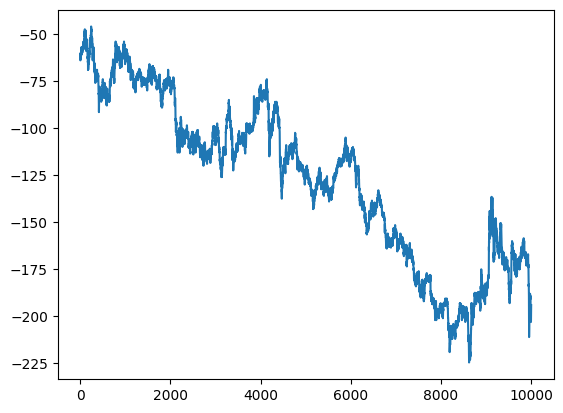

In [45]:
sns.lineplot(i_p - k_p)

<Axes: ylabel='Count'>

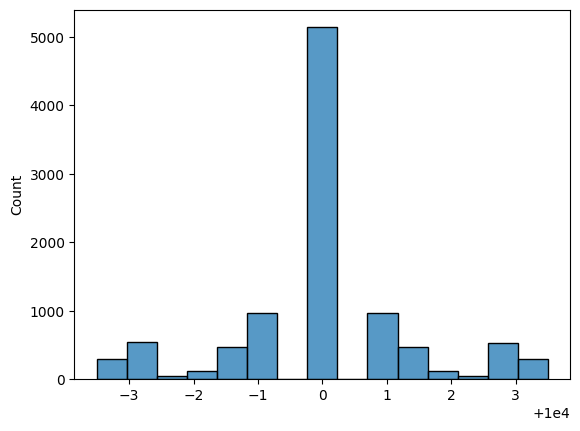

In [46]:
sns.histplot(np.array(resin.mid_price.dropna()))

In [47]:
kelp.index = kelp.timestamp

In [48]:
ink.index = ink.timestamp

In [49]:
resin.index = resin.timestamp

In [50]:
df = pd.DataFrame({'ink': ink.mid_price, 
      'kelp': kelp.mid_price,
      'resin': resin.mid_price
},index=ink.timestamp)

In [51]:
df

,ink,kelp,resin
timestamp,,,
0,1969.5,2030.0,10001.5
100,1970.0,2031.0,9999.0
200,1967.5,2030.5,10000.0
300,1966.5,2030.5,9997.0
400,1967.0,2029.5,10001.0
...,...,...,...
999500,1831.5,2033.5,9998.5
999600,1833.0,2033.5,9999.0
999700,1834.5,2034.5,10000.0


In [52]:
rets = df.ffill().pct_change().dropna()
rets

,ink,kelp,resin
timestamp,,,
100,0.000254,0.000493,-0.00025
200,-0.001269,-0.000246,0.00010
300,-0.000508,0.000000,-0.00030
400,0.000254,-0.000492,0.00040
500,0.000508,0.000000,0.00020
...,...,...,...
999500,0.000546,0.000000,-0.00015
999600,0.000819,0.000000,0.00005
999700,0.000818,0.000492,0.00010


ink-kelp corr in returns and prices

In [53]:
rets.corr()

,ink,kelp,resin
ink,1.000000,0.403357,0.048987
kelp,0.403357,1.000000,0.107298
resin,0.048987,0.107298,1.000000


In [54]:
m,b = np.polyfit(rets['kelp'], rets['ink'], 1)

In [55]:
m,b

(np.float64(0.7265941287847831), np.float64(-6.771011354406092e-06))

In [56]:
rets[(rets['ink'] != 0) & (rets['resin'] != 0)]

,ink,kelp,resin
timestamp,,,
100,0.000254,0.000493,-0.00025
200,-0.001269,-0.000246,0.00010
300,-0.000508,0.000000,-0.00030
400,0.000254,-0.000492,0.00040
500,0.000508,0.000000,0.00020
...,...,...,...
999000,-0.000545,0.000000,0.00045
999100,-0.000546,0.000000,-0.00025
999500,0.000546,0.000000,-0.00015


In [57]:
rets = rets[~((rets['ink'] == 0) & (rets['kelp'] == 0) & (rets['resin'] == 0))]

<Axes: xlabel='timestamp'>

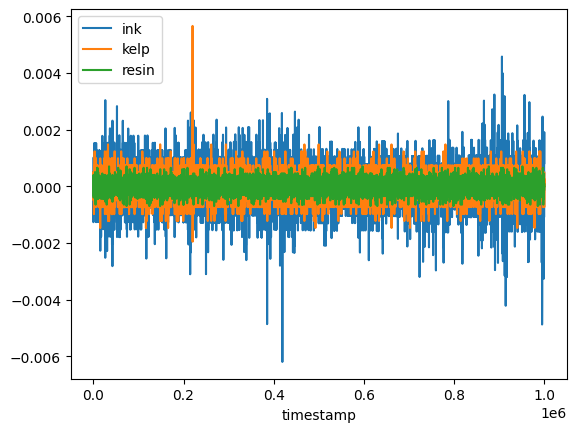

In [58]:
rets.plot()

In [59]:
kelp.mid_price.max()

np.float64(2044.5)

In [60]:
n = len(df['kelp'])
df.loc['k_ret'] = [np.nan] * n
for i in range(n-1): 
    if df['kelp'].iloc[i] and df['kelp'].iloc[i+1]: 
        print(i,df['kelp'].iloc[i],df['kelp'].iloc[i+1])


ValueError: cannot set a row with mismatched columns

In [61]:
price_data = {'ink':np.array(df.ink),'kelp':np.array(df.kelp)}
dt = 1
analyze_tickers(price_data,dt)

[{'t1': 'ink',
  't2': 'kelp',
  'beta': np.float64(0.7030000000000001),
  'theta': np.float64(0.00037020406780261325),
  'mu': np.float64(0.24593209940754773),
  'sigma': np.float64(0.0006087385391561278),
  'likl': np.float64(5.985369386443338)}]